In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.19.0 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.7.0 leidenalg==0.8.1


In [3]:
combined_umap = sc.read('/scratch/combined_umap.h5ad')

In [4]:
dataset_names =['289_Pri','290_Pri','295','296_Pri_CD8pos','305_1_Pri','307_Pri','309_Pri','310','314',
                '316','290_LN2','291_Pri','296_Pri_CD8neg','304_Pri','305_2_Pri','307_sLN','309_sLN',
                '313','315']

# UMAP Visualization by Samples

#### Two observations:
#### (1) 305_1_Pri and 305_2_Pri are stacked which is reassuring since they were derived from the same patient 
#### (2) 296_CD8pos and 296_CD8neg are far away from each other

#### These are reassuring signs for good quality of clustering 

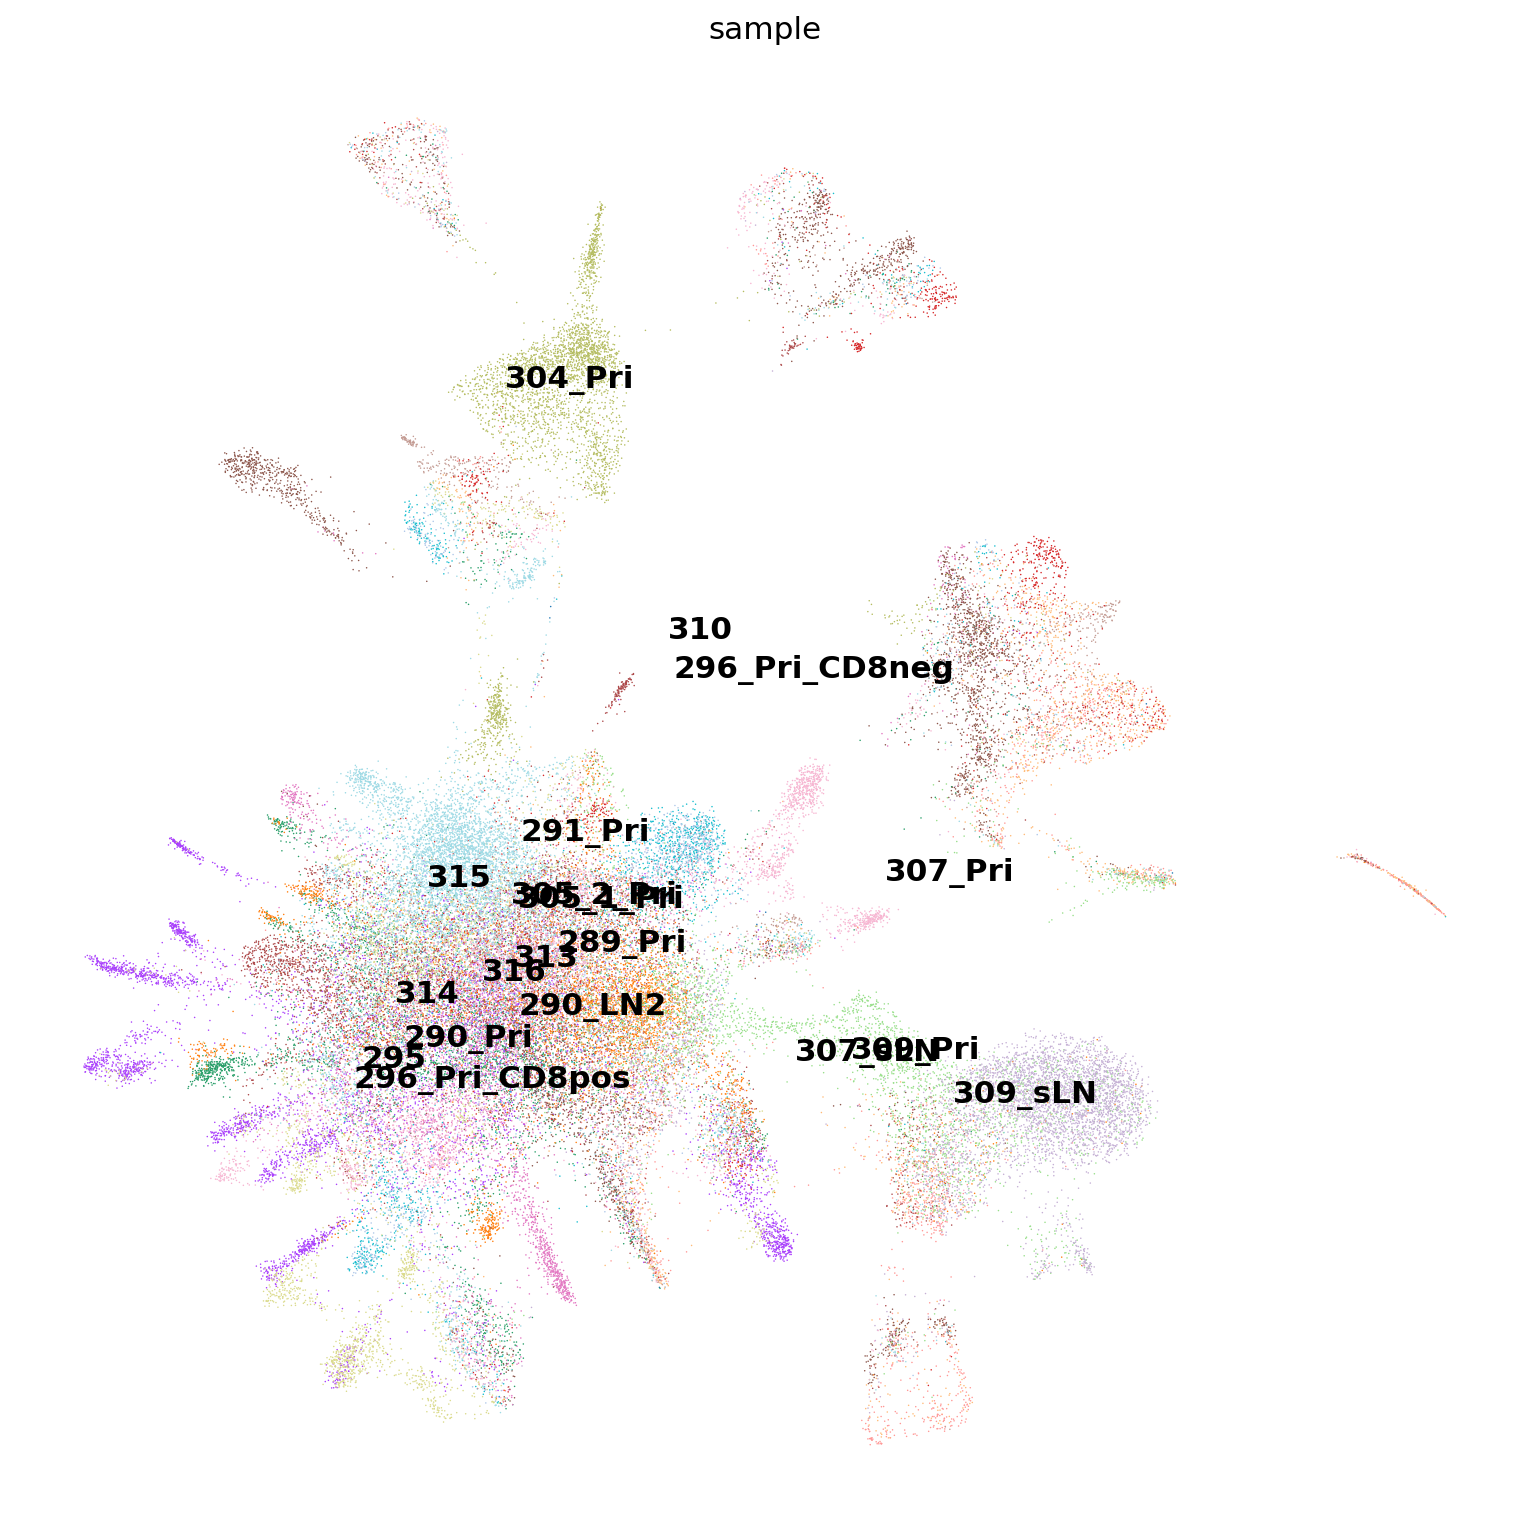

In [5]:
fig, ax = plt.subplots(figsize=(12,12))
sc.pl.umap(combined_umap, color='sample',legend_loc='on data',frameon=False,ax=ax)

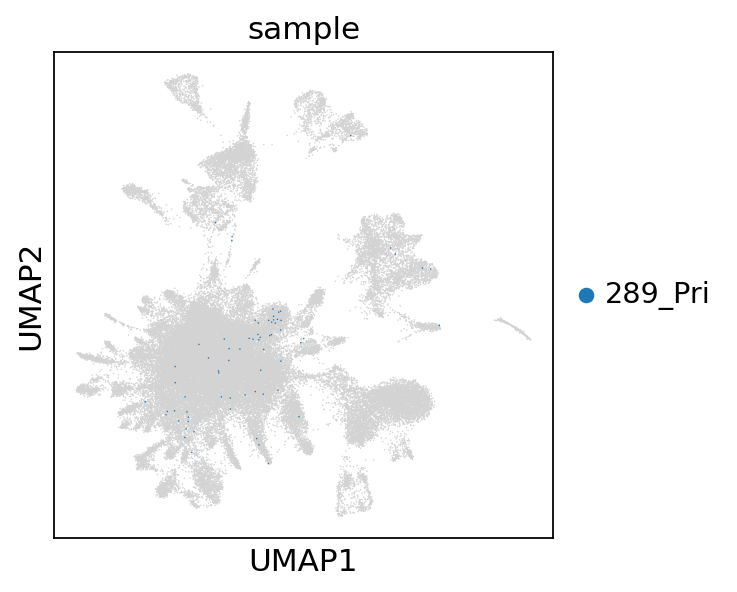

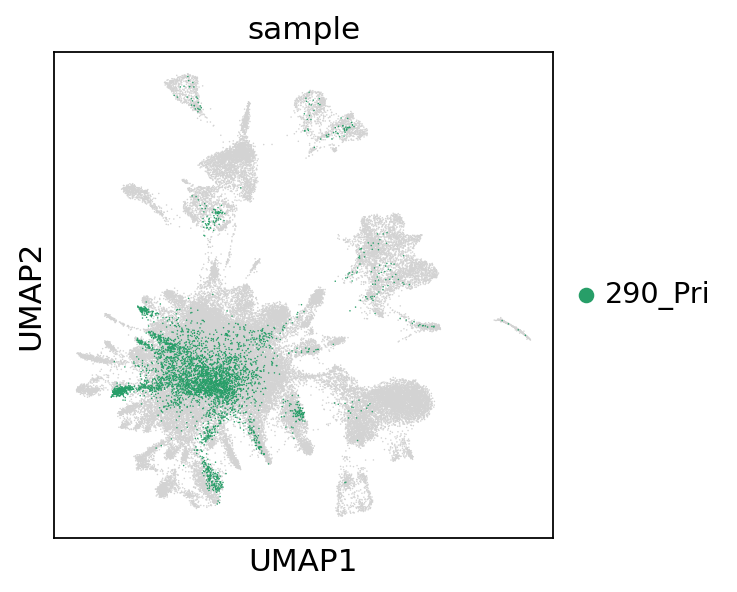

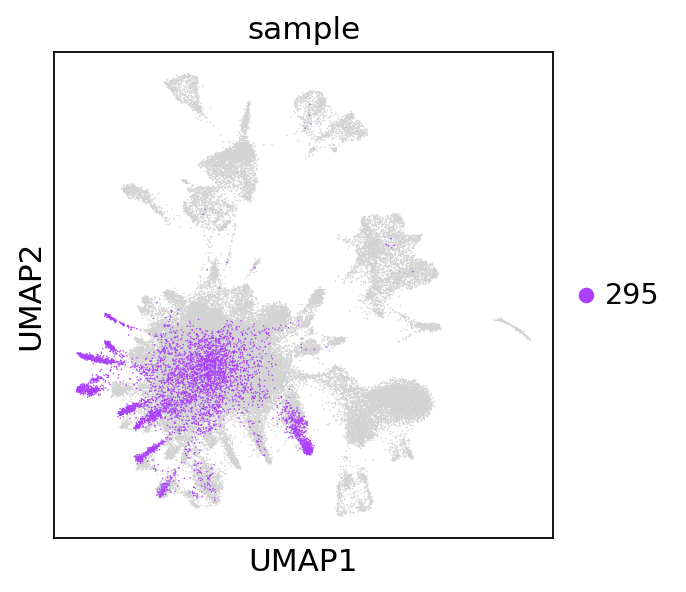

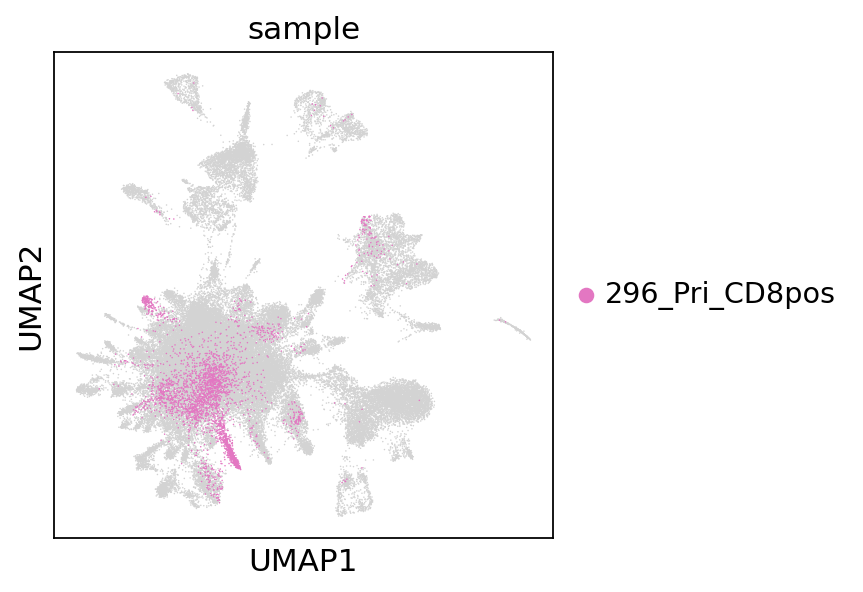

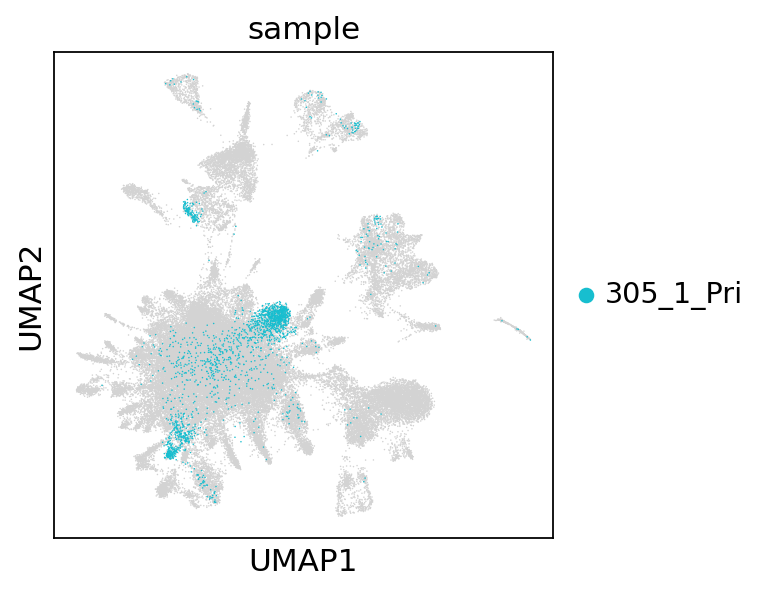

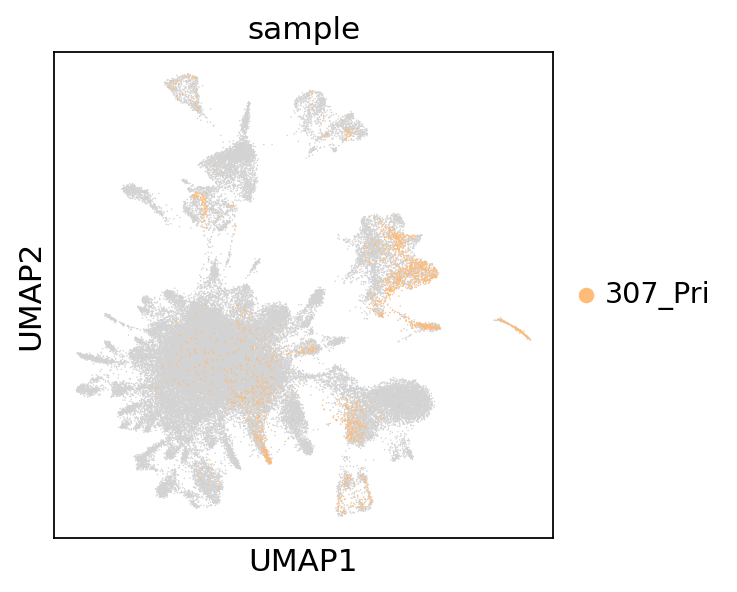

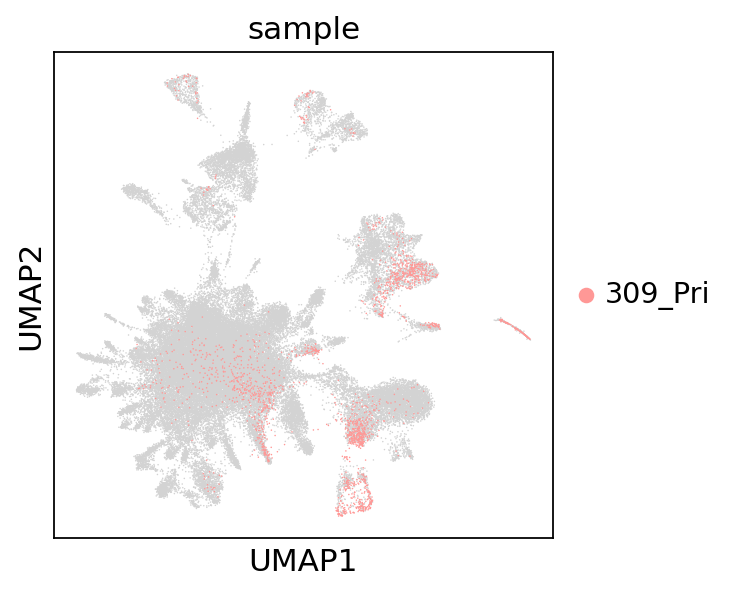

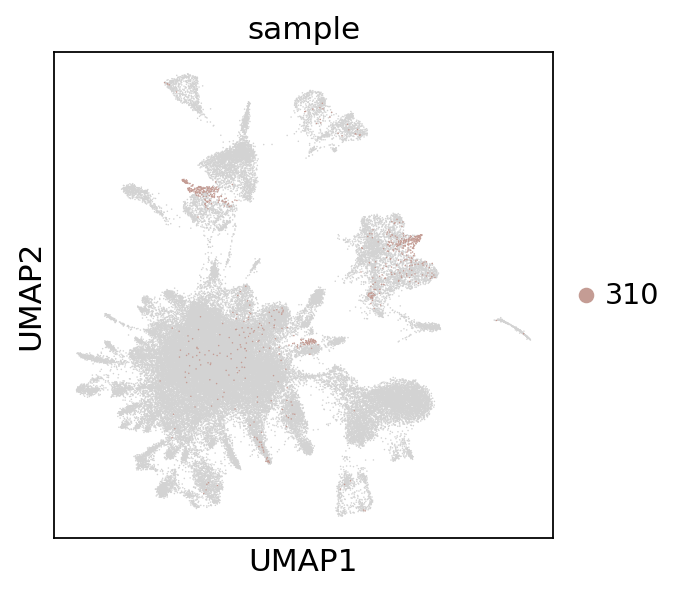

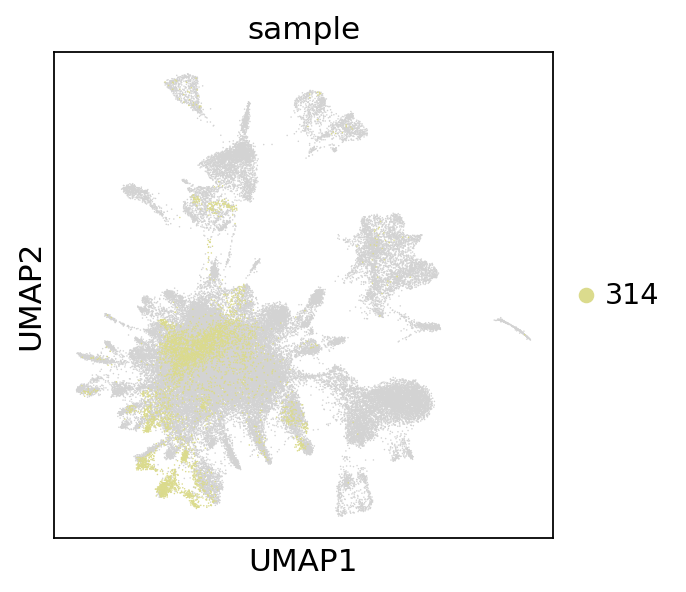

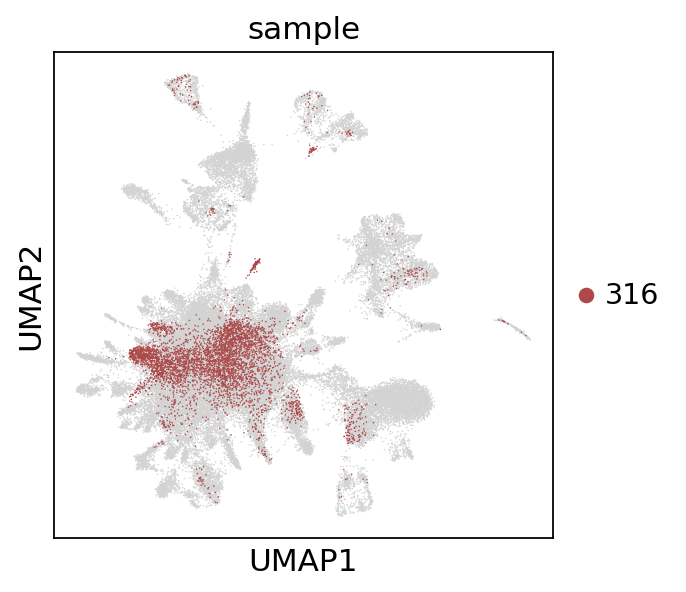

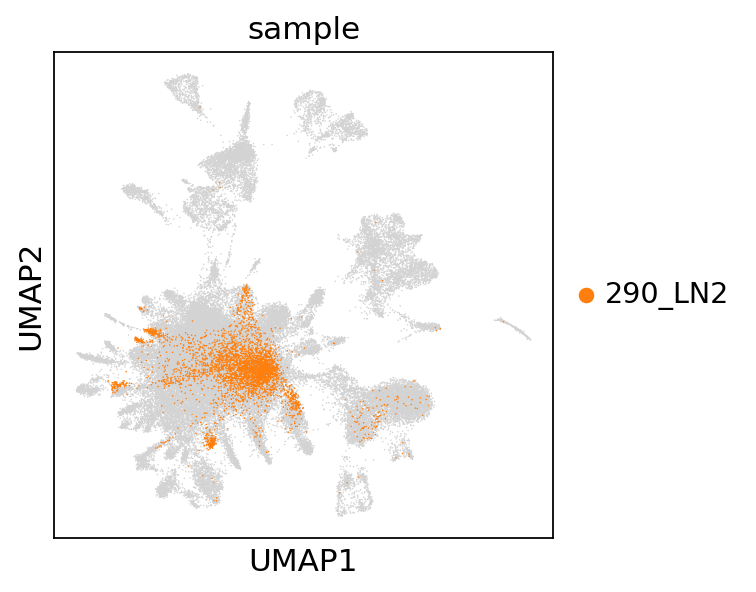

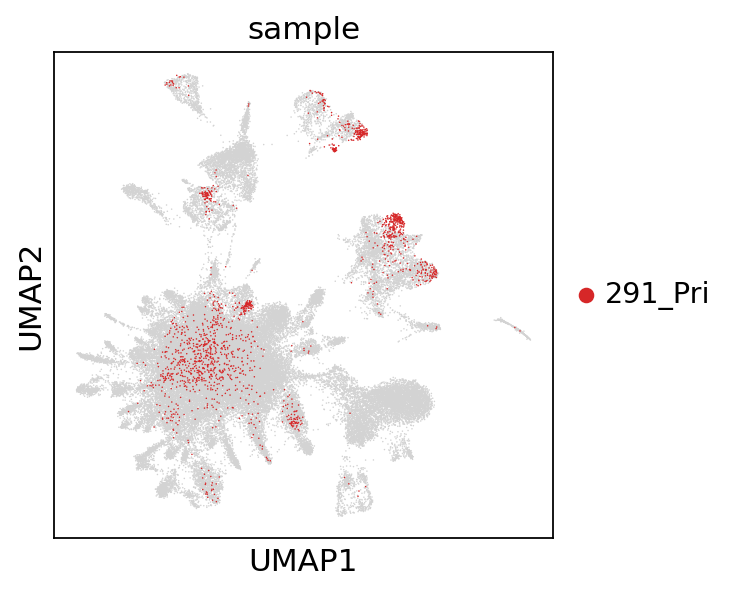

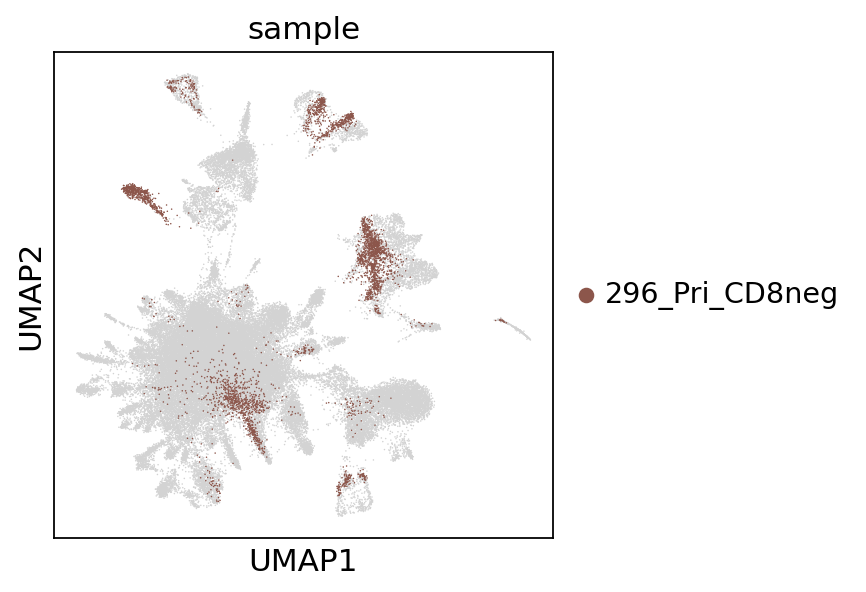

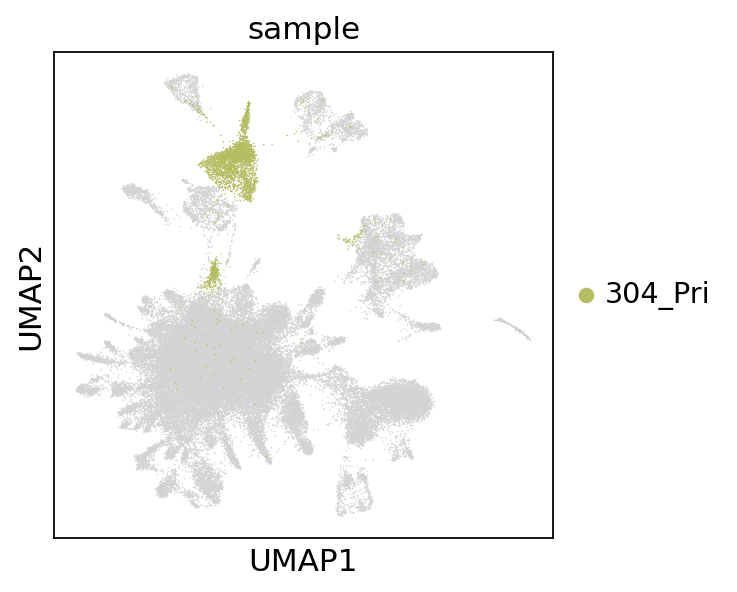

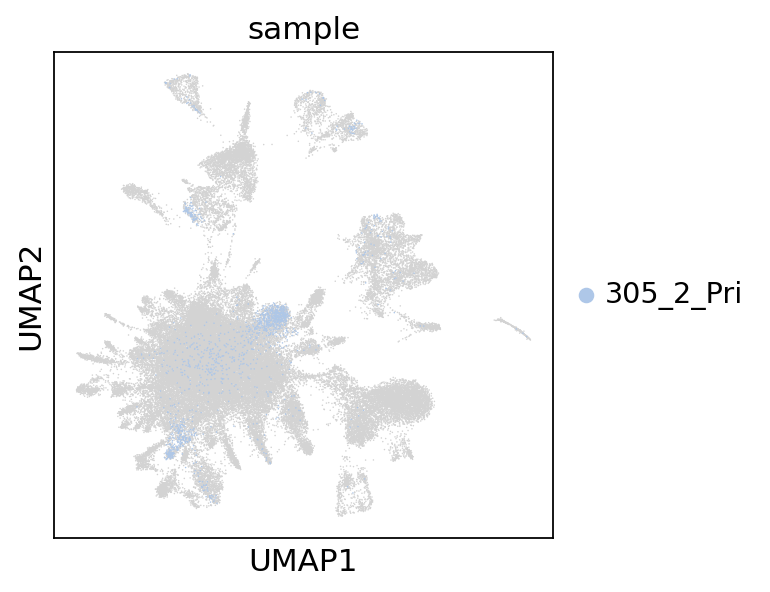

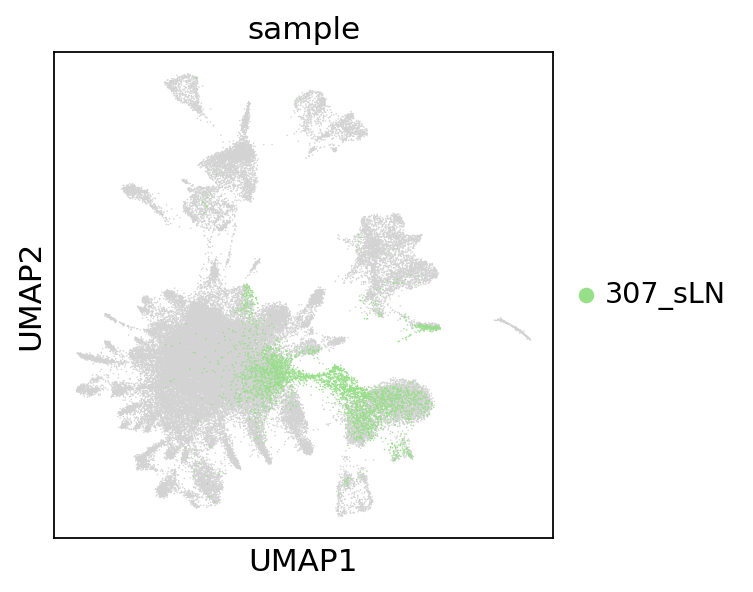

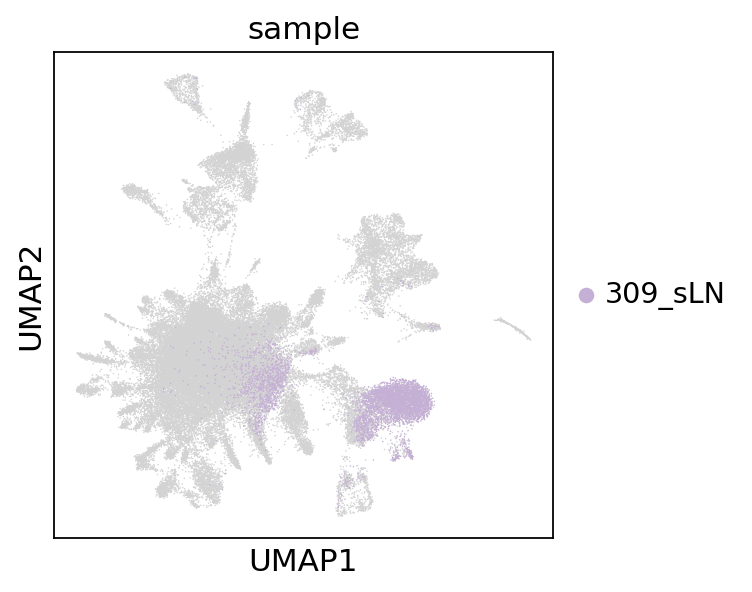

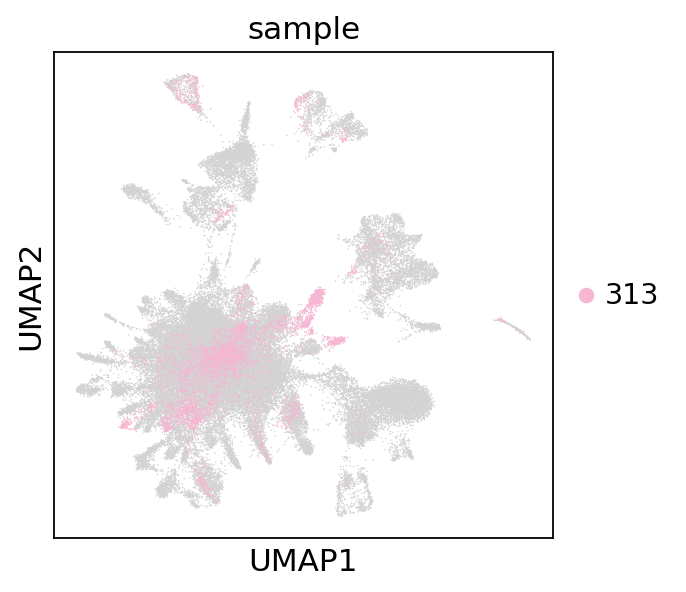

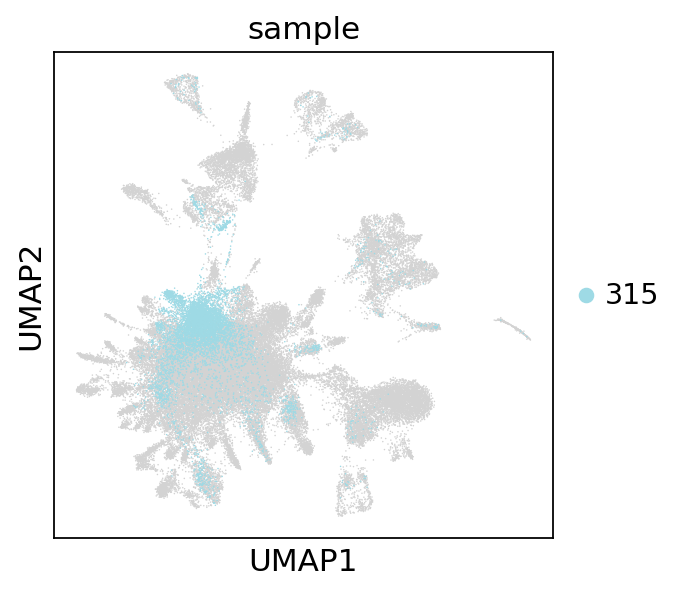

In [6]:
for sample in dataset_names:
    sc.pl.umap(combined_umap, color='sample', groups=[sample])

# UMAP Visualization by Groups

#### Another good sign: good separation of the metastatic and the primary

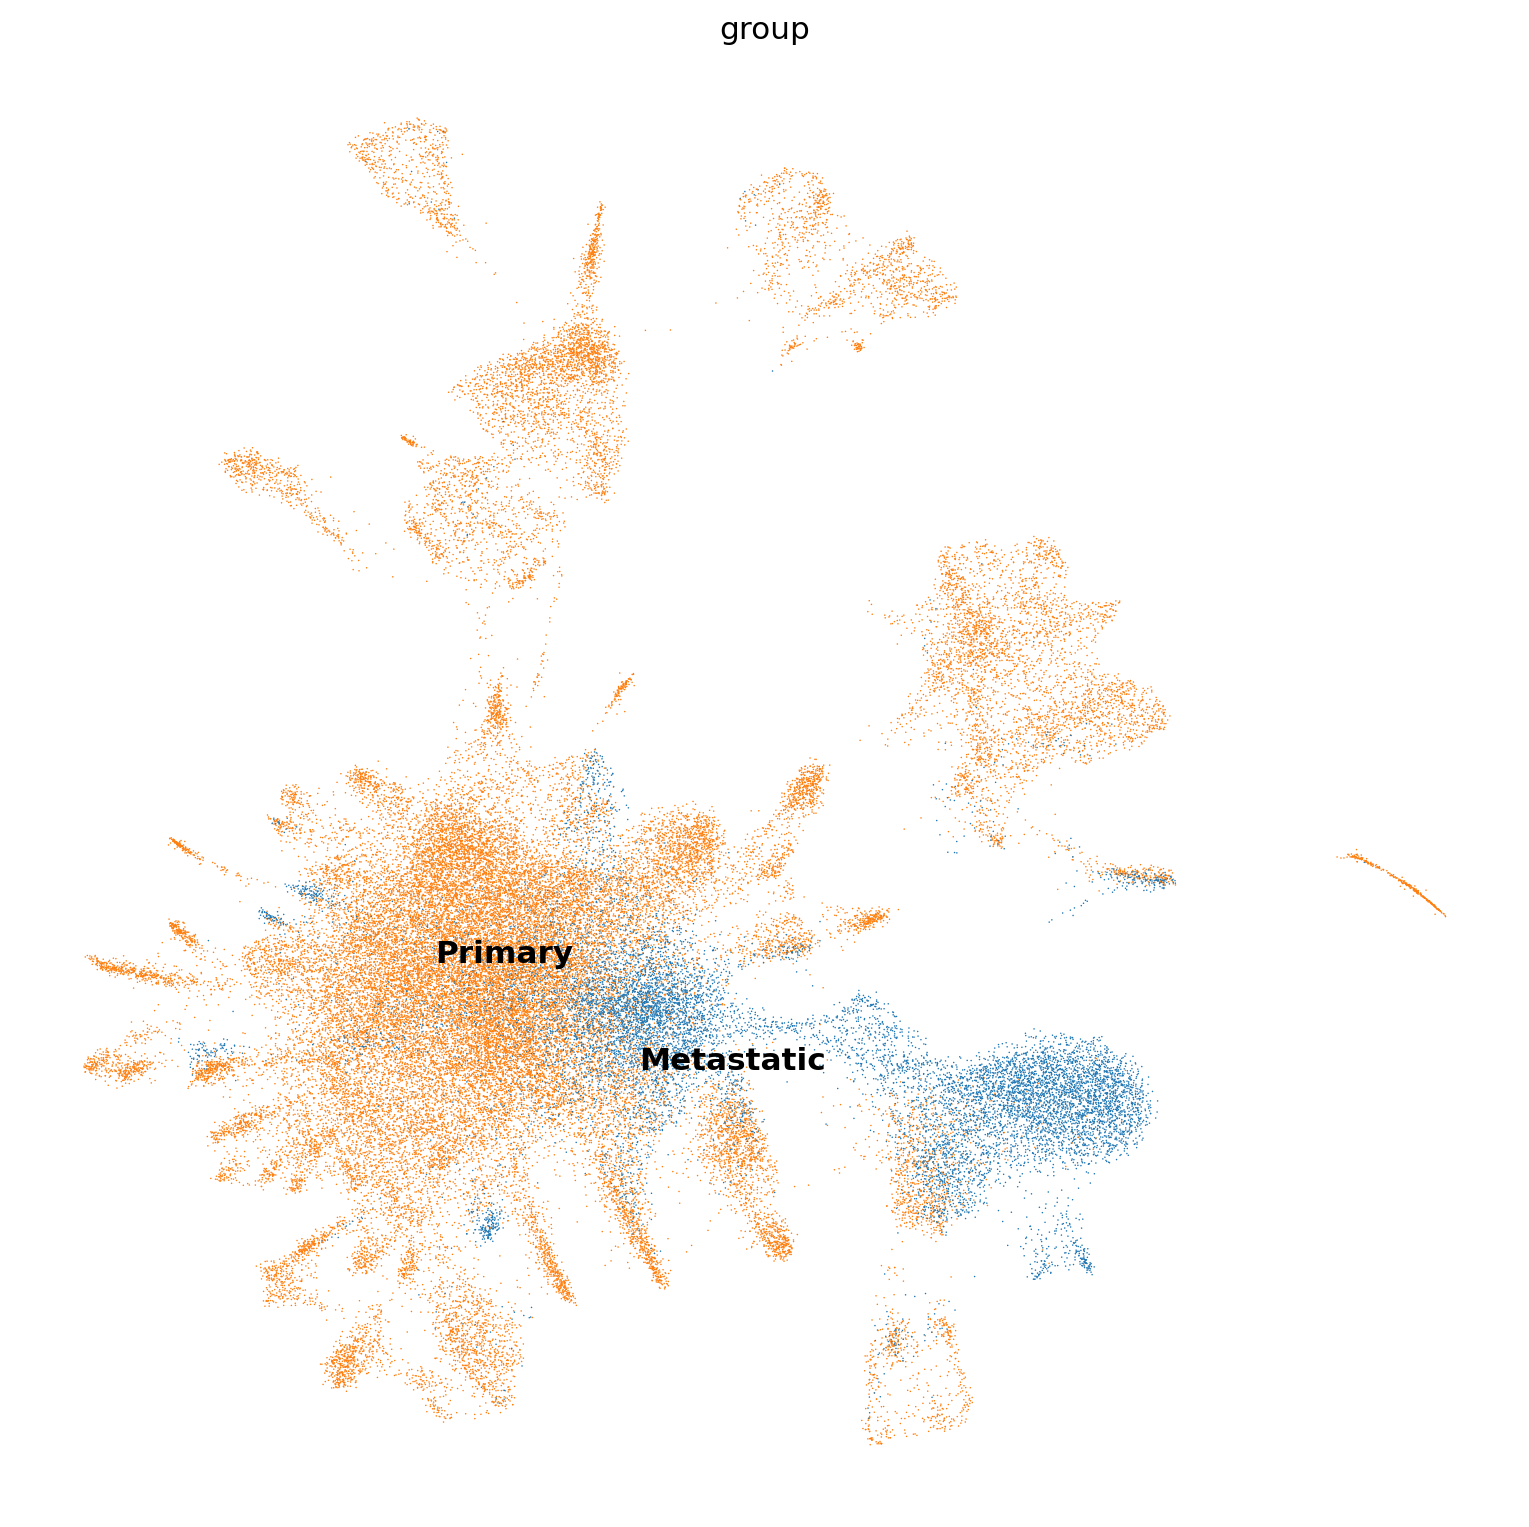

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
sc.pl.umap(combined_umap, color='group',legend_loc='on data',frameon=False,ax=ax)

# UMAP Visualization by Batches

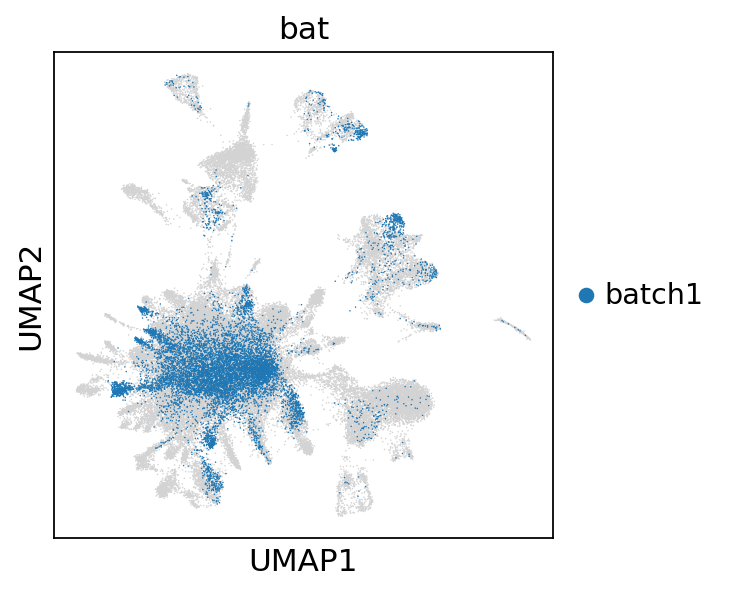

In [8]:
sc.pl.umap(combined_umap, color='bat', groups=['batch1'])

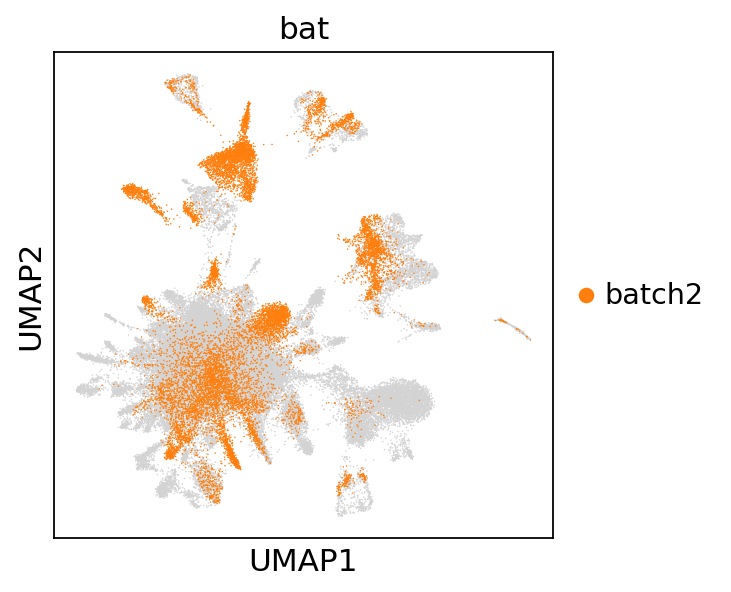

In [9]:
sc.pl.umap(combined_umap, color='bat', groups=['batch2'])

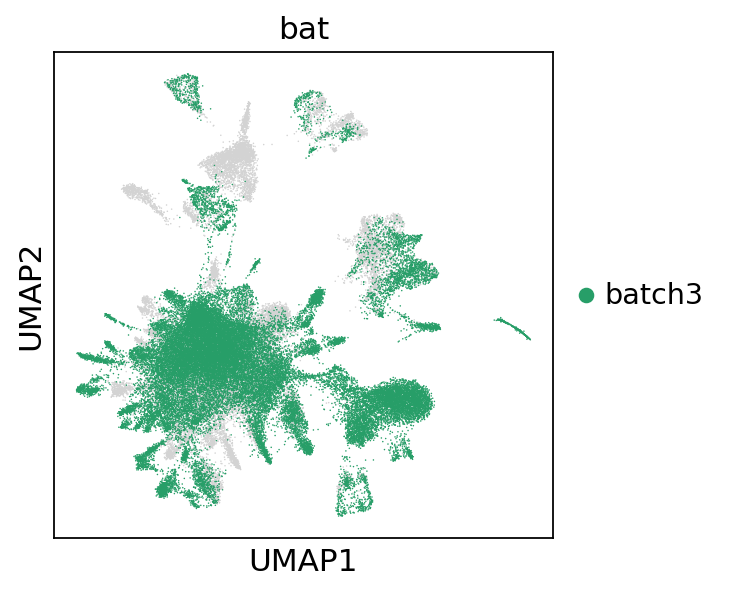

In [10]:
sc.pl.umap(combined_umap, color='bat', groups=['batch3'])

# Addressing the Potential Batch Effect

#### We see there is some potential batch effect in batch 2 (mostly in sample HN304_Pri that forms a cluster by itself). Yet based on the later cluster annotation, this could be just a completely different type of cells (Basal|ESC). If that is the case, then it is less of a concern. So here we are going to highlight CD2 and CD3 genes to see if they are also expressed in the left corner HN304_Pri cluster as well. 

#### The batch effect on the top right corner of batch 3 is not that worrying as it is HN309_sLN which is CD45 enriched so itself being different from the rest.

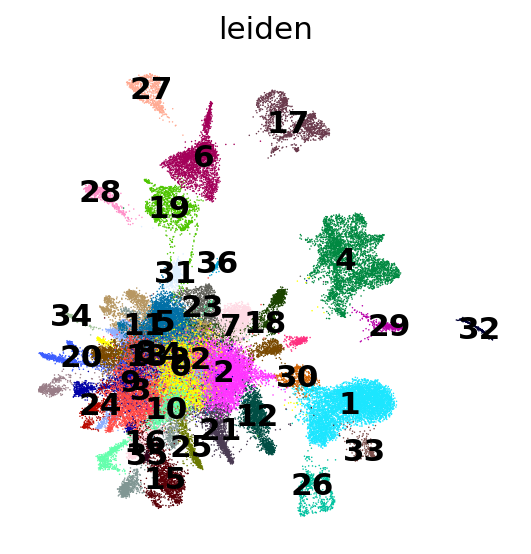

In [11]:
sc.pl.umap(combined_umap, color='leiden',legend_loc='on data',frameon=False)

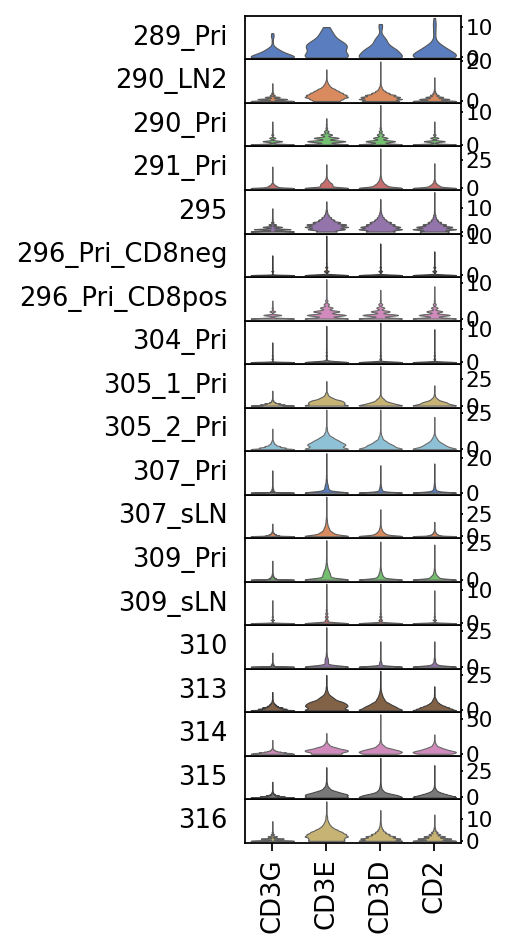

In [12]:
# Look at the distribution of CD3 genes and CD2 gene
marker_genes = ['CD3G','CD3E','CD3D','CD2']
ax = sc.pl.stacked_violin(combined_umap, marker_genes, groupby='sample')

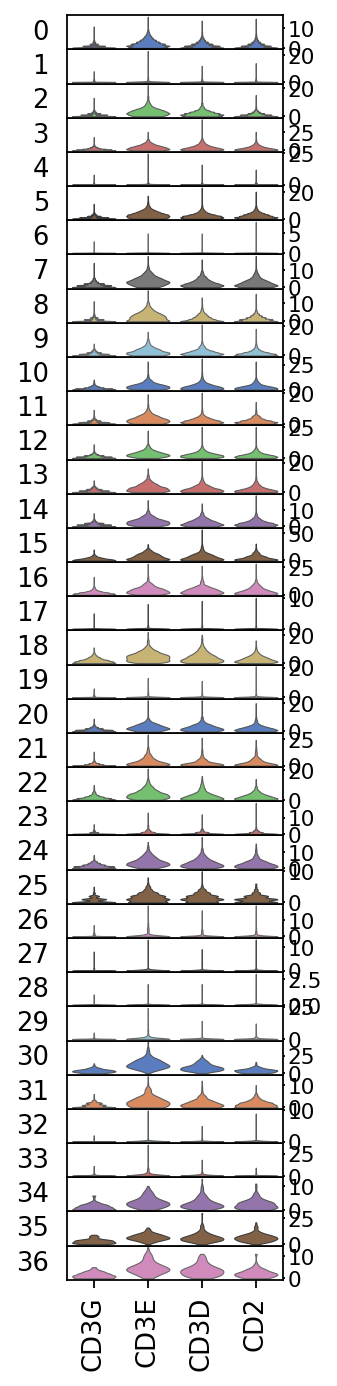

In [13]:
ax = sc.pl.stacked_violin(combined_umap, marker_genes, groupby='leiden')